# Load brain parcellations used to label activation peaks

Here different parcellations are loaded to later serve as input for `add_clusters_label` function. Each parcellation must be processed to contain:
- Nifti1 parcellation image with voxel intensity corresponding to region index (each image must have affine property)
- dictionary `<atlas_name>_label_codes` containing mapping between region index (specified as a key) and region name / label (specified as a value for the given key)

Brain parcellations:
- **CerebrA atlas** (https://www.biorxiv.org/content/10.1101/2019.12.19.883330v1)
- **AAL atlas** (https://www.gin.cnrs.fr/en/tools/aal/)
- **Harvard-Oxford cortical atlas** (thr0, 1mm resolution) (https://neurovault.org/collections/262/)
- **Harvard-Oxford subcortical atlas** (thr0, 1mm resolution) (https://neurovault.org/collections/262/)
- **Hammers adult brain atlas** (http://brain-development.org/brain-atlases/adult-brain-atlases/)

---
**Last update**: 30.07.2020 

In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import pandas as pd
import json
import os

from nilearn import plotting, datasets

path_root = os.environ.get('DECIDENET_PATH')
path_code = os.path.join(path_root, 'code')
if path_code not in sys.path:
    sys.path.append(path_code)

In [2]:
path_nistats = os.path.join(path_root, 'data/main_fmri_study/derivatives/nistats')
path_templates = os.path.join(path_nistats, 'templates')

cut_coords = (-15, 0, 15, 30, 45)

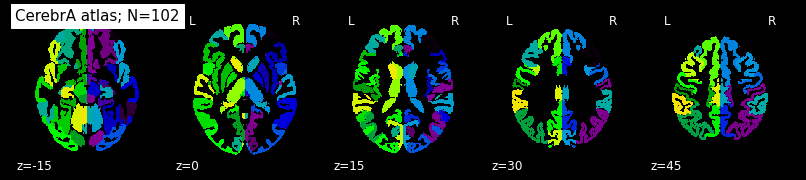

In [3]:
# Load CerebrA atlas (MNI 2009c sym space)
path_cerebra = os.path.join(path_templates, 
                            'mni_icbm152_nlin_sym_09c_CerebrA_nifti')
path_nifti_cerebra = os.path.join(path_cerebra, 
                                  'mni_icbm152_CerebrA_tal_nlin_sym_09c.nii')
img_mni_09c_cerebra = nib.load(path_nifti_cerebra)

df_cerebra = pd.read_csv(
    os.path.join(path_cerebra, 'CerebrA_LabelDetails.csv'),
    index_col=False)

# Preprocess CerebrA atlas
df_cerebra_rh = df_cerebra.loc[:, ['Label Name', 'RH Label']]
df_cerebra_lh = df_cerebra.loc[:, ['Label Name', 'LH Label']]
df_cerebra_rh['Label Name'] = df_cerebra_rh['Label Name'] + ' R.'
df_cerebra_lh['Label Name'] = df_cerebra_lh['Label Name'] + ' L.'
df_cerebra_rh.rename(columns={'RH Label': 'Label'}, inplace=True)
df_cerebra_lh.rename(columns={'LH Label': 'Label'}, inplace=True)
df_cerebra_labels = pd.concat([df_cerebra_lh, df_cerebra_rh])

cerebra_label_codes = {
    idx: name 
    for idx, name in 
    zip(df_cerebra_labels['Label'], df_cerebra_labels['Label Name'])}

plotting.plot_anat(
    img_mni_09c_cerebra, 
    cmap='nipy_spectral',
    cut_coords=cut_coords,
    display_mode='z',
    title=f'CerebrA atlas; N={len(cerebra_label_codes)}',
    draw_cross=False)

plt.show()

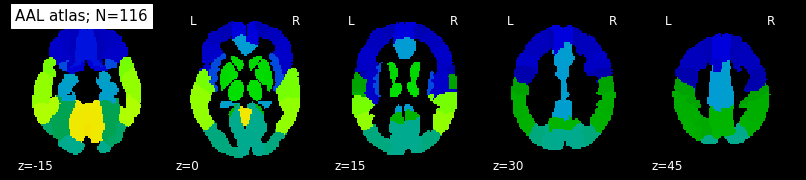

In [4]:
# Load AAL atlas
aal_dataset = datasets.fetch_atlas_aal(
    data_dir=os.path.join(path_templates, 'aal'))

img_aal = nib.load(aal_dataset.maps)
aal_label_codes = {int(idx): label for idx, label in 
                   zip(aal_dataset.indices, aal_dataset.labels)}

plotting.plot_anat(
    img_aal, 
    cmap='nipy_spectral',
    cut_coords=cut_coords,
    display_mode='z',
    title=f'AAL atlas; N={len(aal_label_codes)}',
    draw_cross=False)

plt.show()

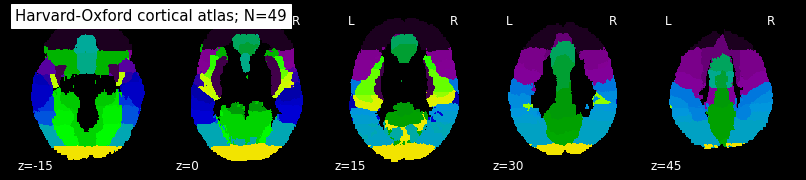

In [5]:
# Load Harvard-Oxford cortical atlas
ho_cort_dataset = datasets.fetch_atlas_harvard_oxford(
    atlas_name='cort-maxprob-thr0-1mm',
    data_dir=os.path.join(path_templates, 'harvard_oxford_cortical'))

img_ho_cort = nib.load(ho_cort_dataset.maps)
ho_cort_label_codes = {idx: label 
                       for idx, label in enumerate(ho_cort_dataset.labels)}

plotting.plot_anat(
    img_ho_cort, 
    cmap='nipy_spectral',
    cut_coords=cut_coords,
    display_mode='z',
    title=f'Harvard-Oxford cortical atlas; N={len(ho_cort_label_codes)}',
    draw_cross=False)

plt.show()

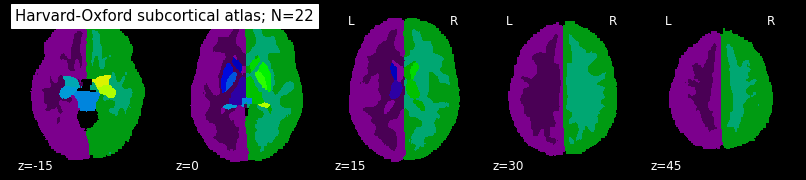

In [6]:
# Load Harvard-Oxford subcortical atlas
ho_sub_dataset = datasets.fetch_atlas_harvard_oxford(
    atlas_name='sub-maxprob-thr0-1mm',
    data_dir=os.path.join(path_templates, 'harvard_oxford_subcortical'))

img_ho_sub = nib.load(ho_sub_dataset.maps)
ho_sub_label_codes = {idx: label 
                      for idx, label in enumerate(ho_sub_dataset.labels)}

plotting.plot_anat(
    img_ho_sub, 
    cmap='nipy_spectral',
    cut_coords=cut_coords,
    display_mode='z',
    title=f'Harvard-Oxford subcortical atlas; N={len(ho_sub_label_codes)}',
    draw_cross=False)

plt.show()

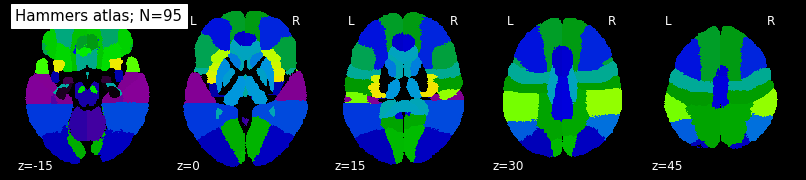

In [7]:
# Load Hammers adult brain atlas
path_hammers = os.path.join(path_templates, 'hammers') 
path_nifti_hammers = os.path.join(
    path_hammers, ('Hammers_mith-n30r95-maxprob-MNI152-SPM12' 
                + '/Hammers_mith-n30r95-MaxProbMap-full-MNI152-SPM12.nii.gz'))

img_hammers = nib.load(path_nifti_hammers)

path_hammers_labels = os.path.join(
    path_hammers, ('Hammers_mith-n30-ancillary-data'
                + '/Hammers_mith_atlases_n30r95_label_indices_SPM12_20170315.xml'))

with open(path_hammers_labels, 'r') as xml_file:
    xml = xml_file.readlines()
    
hammers_label_codes = {}
for line in xml:
    idx = int(line[line.find('<index>')+7:line.find('</index>')])
    label = line[line.find('<name>')+6:line.find('</name>')]
    hammers_label_codes[idx] = label

plotting.plot_anat(
    img_hammers, 
    cmap='nipy_spectral',
    cut_coords=cut_coords,
    display_mode='z',
    title=f'Hammers atlas; N={len(hammers_label_codes)}',
    draw_cross=False)

plt.show()

### Export atlases summary

Here, all relevant information for atlases are merged into `atlases_summary` dictionary with:
- **atlas name**: keys for `atlases_summary`; values correspond to individual atlas dicts
- **path to atlas image**: value for `path_nifti` key (individual atlas dict)
- **label code mapping**: value for `label_codes` key (individual atlas dict)

Next `atlases_summary` is parsed as JSON and stored for further use.

In [8]:
atlases_summary = {
    'CerebrA': {
        'path_nifti': path_nifti_cerebra,
        'label_codes': cerebra_label_codes
    },
    'AAL': {
        'path_nifti': aal_dataset.maps,
        'label_codes': aal_label_codes
    },
    'HO Cortical': {
        'path_nifti': ho_cort_dataset.maps,
        'label_codes': ho_cort_label_codes
    },
    'HO Subcortical': {
        'path_nifti': ho_sub_dataset.maps,
        'label_codes': ho_sub_label_codes
    },
    'Hammers': {
        'path_nifti': path_nifti_hammers,
        'label_codes': hammers_label_codes
    }
}

# Export atlases summary to json file
path_atlases_summary = os.path.join(path_templates, 'atlases_summary.json')
with open (path_atlases_summary, 'w') as f:
    f.writelines(json.dumps(atlases_summary, indent=4))